# Monty Hall

A very famous stats mind trick... You might have seen this already.

The [Monty Hall Problem](https://en.wikipedia.org/wiki/Monty_Hall_problem) was originally posed (and solved) in a letter by Steve Selvin to the American Statistician in [1975](https://www.tandfonline.com/doi/abs/10.1080/00031305.1975.10479121). It became famous as a question from reader Craig F. Whitaker's letter quoted in Marilyn vos Savant's "Ask Marilyn" column in Parade magazine in 1990


You are playing a TV game show and are shown 2 doors.  One has a car behind it, the other a goat.  What are your chances of picking the door with the car?

OK, now there are 3 doors: one with a car, two with goats.  The game show host asks you to pick a door, but not to open it yet.  Then the host opens one of the other two doors (that you did not pick) and that has a goat.  The host offers you the opportunity to switch doors.

- One player decides to switch
- Another player prefers to stay with the previous choice
 
![https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png)

- Now a third player comes in who has not seen what happened earlier. They pick a door.

*Which of the three players is most likely to win?*

You might know or remember the answer already... but don't think now! **Let's simulate it**. 


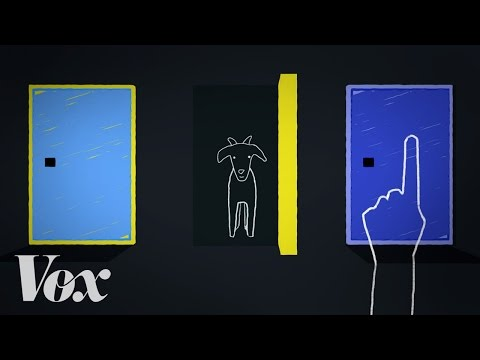

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ggDQXlinbME', width=600, height=400)

In [5]:
import numpy as np
import pylab as plt
import random
from collections import Counter

In [6]:

def MontyHall(N): 
    """
    Simulates a generalized Monty Hall problem with N doors.

    In this simulation:
    - A car is hidden behind one of N doors.
    - A player picks a door at random.
    - The host opens one door that does not hide the car and is not the player's choice.
    - Three strategies are evaluated:
        1. 'conservative' — the original player sticks with their first choice.
        2. 'switcher' — a second player switches to another unopened door.
        3. 'newcommer' — a new player picks randomly from the remaining doors, including the one originally picked.

    Parameters:
        N (int): The number of doors in the game. Should be at least 3.

    Returns:
        list of str: The strategies that successfully picked the door hiding the car.
                     Possible values include 'conservative', 'switcher', and 'newcommer'.
    """
    
    doors = list(range(1, N+1))                    # N doors, named 1,2,...,N
   
    door_with_car = random.choice(doors)           # the car is in one random door

    door_first_choice = random.choice(doors)       # the player choses it's door

    # host opens door

    doors.remove(random.choice([door for door in doors if door != door_with_car and door != door_first_choice]))

    winners = []
    
    #the player sticks to it's choice
    if door_first_choice == door_with_car:
        winners.append('conservative')
    
    #another player changes door
    doors.remove(door_first_choice)
    door_switch = random.choice(doors)
    if door_switch == door_with_car:
        winners.append('switcher')
    
    #a newcommer who hasn't seen anything makes it's bet
    doors.append(door_first_choice)
    door_newcommer_choice = random.choice(doors)
    if door_newcommer_choice == door_with_car:
        winners.append('newcommer')

    return winners



In [7]:
MontyHall?

Signature: MontyHall(N)
Docstring:
Simulates a generalized Monty Hall problem with N doors.

In this simulation:
- A car is hidden behind one of N doors.
- A player picks a door at random.
- The host opens one door that does not hide the car and is not the player's choice.
- Three strategies are evaluated:
    1. 'conservative' — the original player sticks with their first choice.
    2. 'switcher' — a second player switches to another unopened door.
    3. 'newcommer' — a new player picks randomly from the remaining doors, including the one originally picked.

Parameters:
    N (int): The number of doors in the game. Should be at least 3.

Returns:
    list of str: The strategies that successfully picked the door hiding the car.
                 Possible values include 'conservative', 'switcher', and 'newcommer'.
File:      /tmp/ipykernel_45053/2395852218.py
Type:      function

Strategy              Expected Wins         Actual Wins
-------------------------------------------------------
conservative               20000.00               19979
switcher                   26666.67               26784
newcommer                  25000.00               24811


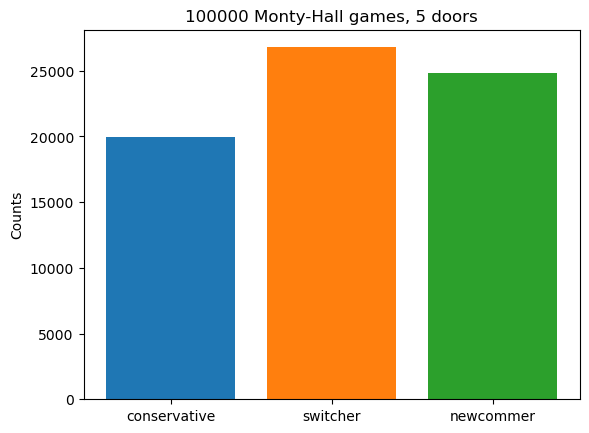

In [30]:
N_doors = 5
n_games = 100000

games = []
for _ in range(n_games):           # 1000 games
    games.append(MontyHall(N_doors))  # 3 doors

results = [winners for game in games for winners in game]

counts = Counter(results)


categories = ['conservative', 'switcher', 'newcommer']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
ordered_counts = [counts.get(category, 0) for category in categories]

# Predicted results
expected = {
    'conservative': n_games * (N_doors - 1) * (1 / N_doors) * (1 / (N_doors -1 )) ,
    'switcher': n_games * (N_doors - 1) * (1 / N_doors) * (1 / (N_doors -2 )),
    'newcommer': n_games * (1 / (N_doors - 1))
}

# Print expected vs actual
print(f"{'Strategy':<15}{'Expected Wins':>20}{'Actual Wins':>20}")
print("-" * 55)
for cat in categories:
    exp = expected[cat]
    act = counts.get(cat, 0)
    print(f"{cat:<15}{exp:>20.2f}{act:>20}")


# Plot the histogram
plt.bar(categories, ordered_counts, color=colors)
plt.ylabel('Counts')
plt.title(f'{n_games:.0f} Monty-Hall games, {N_doors:.0f} doors')
plt.show()

# Simple Solution

Most people conclude that switching does not matter, because there would be a 50% chance of finding the car behind either of the two unopened doors. This would be true if the host selected a door to open at random, but this is not the case. The host-opened door depends on the player's initial choice, so the assumption of independence does not hold. Before the host opens a door, there is a ⁠
1
/
3
⁠ probability that the car is behind each door. If the car is behind door 1, the host can open either door 2 or door 3, so the probability that the car is behind door 1 and the host opens door 3 is ⁠
1
/
3
⁠ × ⁠
1
/
2
⁠ = ⁠
1
/
6
⁠. If the car is behind door 2 – with the player having picked door 1 – the host must open door 3, such the probability that the car is behind door 2 and the host opens door 3 is ⁠
1
/
3
⁠ × 1 = ⁠
1
/
3
⁠


As Keith Devlin says, "By opening his door, Monty is saying to the contestant 'There are two doors you did not choose, and the probability that the prize is behind one of them is ⁠
2
/
3
⁠. I'll help you by using my knowledge of where the prize is to open one of those two doors to show you that it does not hide the prize. You can now take advantage of this additional information. Your choice of door A has a chance of 1 in 3 of being the winner. I have not changed that. But by eliminating door C, I have shown you that the probability that door B hides the prize is 2 in 3.'"


Savant suggests that the solution will be more intuitive with 1,000,000 doors rather than 3. In this case, there are 999,999 doors with goats behind them and one door with a prize. After the player picks a door, the host opens 999,998 of the remaining doors. On average, in 999,999 times out of 1,000,000, the remaining door will contain the prize. Intuitively, the player should ask how likely it is that, given a million doors, they managed to pick the right one initially.



### Monty Hall with \( N \) doors — Probabilities

Assume the player always picks **Door 1**.

---

#### Conservative Strategy (Stays with Door 1)

- Probability that the car is behind Door 1:  
  $$
  P(\text{car in Door 1}) = \frac{1}{N}
  $$

- Host chooses a door from the remaining $N - 1$ doors:  
  $$
  P(\text{host picks one of } N-1 \text{ doors}) = \frac{1}{N - 1}
  $$

- Multiply over all $N - 1$ possible host choices:
  $$
  (N - 1) \cdot \frac{1}{N} \cdot \frac{1}{N - 1} = \frac{1}{N}
  $$

**Probability of winning by staying**:  
$$
P_{\text{conservative}} = \frac{1}{N}
$$

---

#### Switcher Strategy (Car is behind another door)

- There are $N - 1$ other doors the car could be behind.
- For each such door:
  - Probability car is there: $\frac{1}{N}$
  - Host must avoid that door and Door 1 → has \( N - 2 \) options:
    $$
    P(\text{host picks a valid door}) = \frac{1}{N - 2}
    $$

- Multiply over all \( N - 1 \) possible "car not in Door 1" cases:
  $$
  (N - 1) \cdot \frac{1}{N} \cdot \frac{1}{N - 2} = \frac{N - 1}{N(N - 2)}
  $$

**Probability of winning by switching**:  
$$
P_{\text{switcher}} = \frac{N - 1}{N(N - 2)}
$$
